# BuildSys 2020 Figures
The point of this notebook is to generate good quality figures for the BuildSys 2020 conference.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Package Import

In [2]:
import os
import sys
sys.path.append('../')

from src.features import build_features
from src.visualization import visualize
from src.reports import make_report

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.animation as animation

# Overview of Figures
There are few figures we want to create for the poster. In general, we want to create four figures:
1. Beacon
2. Fitbit
3. Beiwe
4. Combination of the previous three

Zoltan is also very adamant about animating our figures, so we need to look into that. He sent a [link](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1) that has some promising information. 

## Animation Test
More information on animation can be found using these blog posts:
- [Somewhat Helpful](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [More Helpful](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c)

And documentation on the main animate function is [here](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.animation.FuncAnimation.html)

In [3]:
beacon_data = pd.read_csv('../data/processed/bpeace2-beacon.csv',index_col=0,parse_dates=True)
# show it off:
beacon_data.head()

,TVOC,eCO2,Lux,Visible,Infrared,NO2,T_NO2,RH_NO2,CO,T_CO,...,PM_N_10,PM_C_1,PM_C_2p5,PM_C_4,PM_C_10,z,Beacon,Beiwe,Fitbit,REDCap
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4
2020-06-11 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4
2020-06-11 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4
2020-06-11 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4
2020-06-11 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4


In [4]:
beacon_bb = beacon_data[beacon_data['Beacon'] == 19][datetime(2020,7,6):datetime(2020,7,14)]
beacon_bb = beacon_bb.resample('60T').mean()
beacon_bb_pollutants = beacon_bb[['CO2','PM_C_2p5','NO2','CO','TVOC','Lux','T_CO']]

normalized_df = (beacon_bb_pollutants-beacon_bb_pollutants.min())/(beacon_bb_pollutants.max()-beacon_bb_pollutants.min())

In [5]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

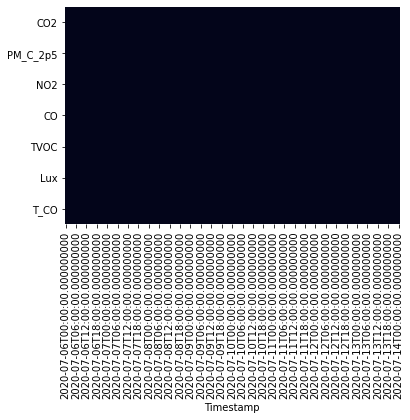

In [6]:
#%matplotlib notebook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation

fig = plt.figure()

def init():
    initial = normalized_df.T
    initial = initial.replace(initial, 0)
    sns.heatmap(initial, vmax=1, cbar=False)

def animate(i):
    data = normalized_df.T[normalized_df.T < i/10]
    sns.heatmap(data, vmax=1, cbar=False)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=10, repeat = False)
anim.save('../test_heatmap.mp4', writer=writer)

# Beacon 

<div class="alert alert-block alert-success">
    We are looking for a good summary of a week's worth of data. Looks:
    <ul>
        <li>week of July 6 is a good place to start</li>
        <li>Beacon 19</li>
    </ul>
    </div>

In [7]:
def create_cmap(colors,nodes):
    cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
    return cmap

## Static Plot

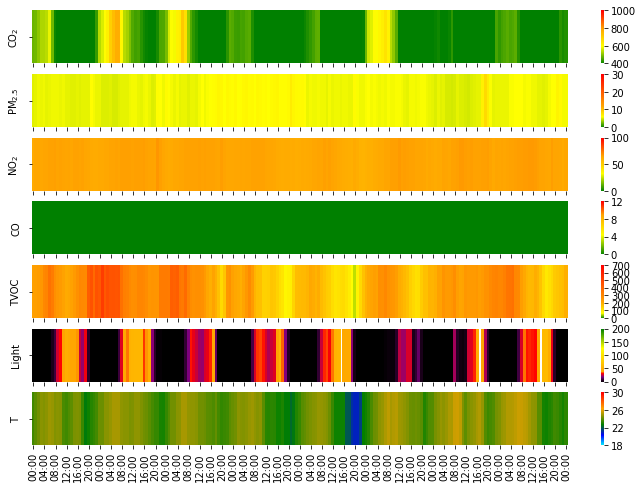

In [14]:
# Creating the dataframe
beacon_bb = beacon_data[beacon_data['Beacon'] == 19][datetime(2020,7,6):datetime(2020,7,14)]
beacon_bb = beacon_bb.resample('60T').mean()
beacon_bb_pollutants = beacon_bb[['CO2','PM_C_2p5','NO2','CO','TVOC','Lux','T_CO']]
fig, axes = plt.subplots(7,1,figsize=(12,8),sharex=True)
ylabels = ['CO$_2$',
           'PM$_{2.5}$',
           'NO$_2$',
           'CO',
           'TVOC',
           'Light',
           'T']
cbar_ticks = [np.arange(400,1200,200),
          np.arange(0,40,10),
          np.arange(0,120,50),
          np.arange(0,15,4),
          np.arange(0,800,100),
          np.arange(0,250,50),
          np.arange(18,32,4)]
cmaps = [create_cmap(["green", "yellow", "orange", "red",],[0.0, 0.33, 0.66, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.2, 0.4, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.33, 0.66, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.375, 0.75, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.1, 0.31, 1]),
         create_cmap(["black","purple","red","orange","yellow","green"],[0.0, 0.1, 0.16, 0.2, 0.64, 1]),
         create_cmap(["cyan","blue","green","orange","red"],[0.0, 0.2, 0.4, 0.7, 1])]
for ax, var, low, high, ylabel, ticks, cmap in zip(axes,beacon_bb_pollutants.columns,[400,0,0,0,0,0,18],[1000,30,100,12,700,200,30],ylabels,cbar_ticks,cmaps):
    sns.heatmap(beacon_bb_pollutants[[var]].T,vmin=low,vmax=high,ax=ax,cbar_kws={'ticks':ticks},cmap=cmap)
    ax.set_ylabel(ylabel)
    ax.set_yticklabels([''])
    ax.set_xlabel('')

xlabels = ax.get_xticklabels()
new_xlabels = []
for label in xlabels:
    new_xlabels.append(label.get_text()[11:16])

ax.set_xticklabels(new_xlabels)

plt.savefig('../reports/BuildSys2020/beacon_heatmap.pdf')
plt.show()
plt.close()

## Animation

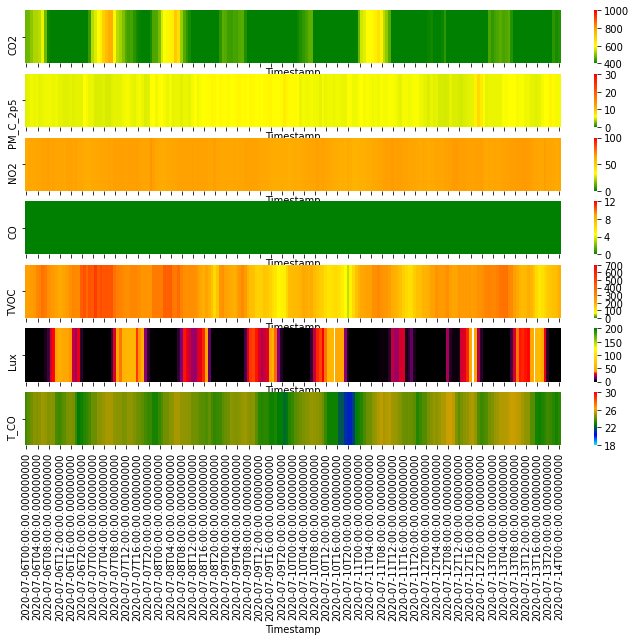

In [8]:
#%matplotlib notebook
# Creating the dataframe
beacon_bb = beacon_data[beacon_data['Beacon'] == 19][datetime(2020,7,6):datetime(2020,7,14)]
beacon_bb = beacon_bb.resample('60T').mean()
beacon_bb_pollutants = beacon_bb[['CO2','PM_C_2p5','NO2','CO','TVOC','Lux','T_CO']]
# creating the figure
fig, axes = plt.subplots(7,1,figsize=(12,8),sharex=True)
ylabels = ['CO$_2$',
               'PM$_{2.5}$',
               'NO$_2$',
               'CO',
               'TVOC',
               'Light',
               'T']
cbar_ticks = [np.arange(400,1200,200),
              np.arange(0,40,10),
              np.arange(0,120,50),
              np.arange(0,15,4),
              np.arange(0,800,100),
              np.arange(0,250,50),
              np.arange(18,32,4)]
cmaps = [create_cmap(["green", "yellow", "orange", "red",],[0.0, 0.33, 0.66, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.2, 0.4, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.33, 0.66, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.375, 0.75, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.1, 0.31, 1]),
         create_cmap(["black","purple","red","orange","yellow","green"],[0.0, 0.1, 0.16, 0.2, 0.64, 1]),
         create_cmap(["cyan","blue","green","orange","red"],[0.0, 0.2, 0.4, 0.7, 1])]
for ax, var, low, high, ylabel, ticks, cmap in zip(axes,beacon_bb_pollutants.columns,[400,0,0,0,0,0,18],[1000,30,100,12,700,200,30],ylabels,cbar_ticks,cmaps):
    sns.heatmap(beacon_bb_pollutants[[var]].T,vmin=low,vmax=high,ax=ax,cbar_kws={'ticks':ticks},cmap=cmap)
    ax.set_ylabel(ylabel)
    ax.set_yticklabels([''])
    ax.set_xlabel('')
    
xlabels = ax.get_xticklabels()
new_xlabels = []
for label in xlabels:
    new_xlabels.append(label.get_text()[11:16])

ax.set_xticklabels(new_xlabels)

# Animation
frames = 50
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
def init():
    initial = beacon_bb_pollutants
    initial = initial.replace(initial, np.nan)
    for ax, var in zip(axes,beacon_bb_pollutants.columns):
        sns.heatmap(initial[[var]].T, cbar=False, ax=ax)
def animate(i):
    ylabels = ['CO$_2$',
               'PM$_{2.5}$',
               'NO$_2$',
               'CO',
               'TVOC',
               'Light',
               'T']
    cbar_ticks = [np.arange(400,1200,200),
              np.arange(0,40,10),
              np.arange(0,120,50),
              np.arange(0,15,4),
              np.arange(0,800,100),
              np.arange(0,250,50),
              np.arange(18,32,4)]
    cmaps = [create_cmap(["green", "yellow", "orange", "red",],[0.0, 0.33, 0.66, 1]),
             create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.2, 0.4, 1]),
             create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.33, 0.66, 1]),
             create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.375, 0.75, 1]),
             create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.1, 0.31, 1]),
             create_cmap(["black","purple","red","orange","yellow","green"],[0.0, 0.1, 0.16, 0.2, 0.64, 1]),
             create_cmap(["cyan","blue","green","orange","red"],[0.0, 0.2, 0.4, 0.7, 1])]
    for ax, var, low, high, ylabel, ticks, cmap in zip(axes,beacon_bb_pollutants.columns,[400,0,0,0,0,0,18],[1000,30,100,12,700,200,30],ylabels,cbar_ticks,cmaps):
        df = beacon_bb_pollutants[[var]].T
        df = df[df <= np.nanmax(df)*((i+1)/frames)]
        sns.heatmap(df,vmin=low,vmax=high,ax=ax,cbar=False,cmap=cmap)
        ax.set_ylabel(ylabel)
        ax.set_yticklabels([''])
        ax.set_xlabel('')
        
    xlabels = ax.get_xticklabels()
    new_xlabels = []
    for label in xlabels:
        new_xlabels.append(label.get_text()[11:16])

ax.set_xticklabels(new_xlabels)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=1000, repeat = False)
anim.save('../reports/BuildSys2020/beacon_heatmap.mp4', writer=writer)
